# 

In [97]:
import pandas as pd
import P2G7_pipeline_utils as p_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from P2G7_pipeline_utils import healthcare_model_generator
#add seaborn
import seaborn as sns

In [2]:
# create dataframe from .csv file "healthcare-dataset-stroke-data.csv". The source data was downlaoded from XXXX
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Get a quick peek into the dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Determine if dropping null, or not, is better for accuracy. Used Logistic Regression model in pipeline to determine 
# Mean Squared Error and R-squared for each scenario.
#healthcare_model = p_utils.healthcare_model_generator(df)

Dropped 3.93% rows
Testing dropped NAs
Mean Squared Error: 0.04478827361563518
R-squared: -0.04688832054560965
Adjusted R-squared: 0.9548065693039602
Testing no dropped data
Mean Squared Error: 0.056338028169014086
R-squared: -0.07373653686826831
Adjusted R-squared: 0.9431724628974478
Returning dropped NAs pipeline


In [4]:
# Analyze bmi value to determine appropriate value for nulls
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [5]:
# Recommended not to drop null. Filling in null bmi with mean of bmi value. New df returned from pipeline - df_bmi_filled. 
df_copy = df.copy()
df_bmi_filled = p_utils.fill_bmi_na(df_copy)
df_bmi_filled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

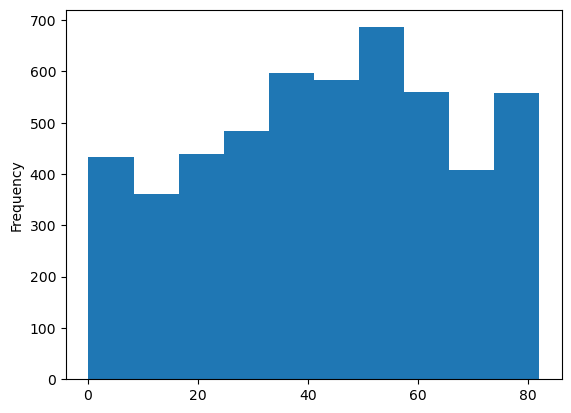

In [7]:
#do age binning. check age distribution in historgram.select bin size based on counts.
df["age"].plot(kind="hist")

In [8]:
# Bin age as it is a continuous variable and unique (some repetation). We want to minimize unique features
df_bmi_filled_age_bin = p_utils.bin_age(df_bmi_filled)
df_bmi_filled_age_bin.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [46]:
df_bmi_filled_age_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  bin_age            5110 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 499.2+ KB


In [45]:
df_bmi_filled_age_bin["bin_age"]=df_bmi_filled_age_bin["bin_age"].astype(int)

<Axes: ylabel='Frequency'>

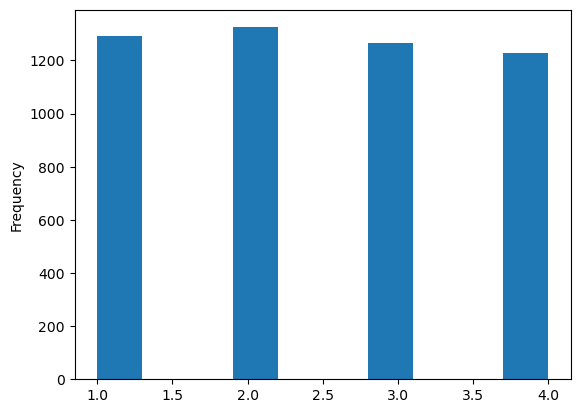

In [47]:
#df_bmi_filled_age_bin["bin_age"].describe()
df_bmi_filled_age_bin["bin_age"].plot(kind="hist") #does not work

In [21]:
# Drop unique features id and age
df_drop_id_age = p_utils.drop_id_age(df_bmi_filled_age_bin)
df_drop_id_age.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [22]:
df_drop_id_age['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [23]:
# Drop row with feature gender = Other
df_final = p_utils.delete_gender_other(df_drop_id_age)
df_final.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [24]:
df_final['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [25]:
df_final["work_type"].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [26]:
df_final["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14a2eb80a90>,
 [Text(-1.3348689241722351, 0.42204852242278995, 'No Hypertension'),
  Text(1.1441733551086937, -0.36175590314370154, 'Hypertension')],
 [Text(-0.8581300226821509, 0.2713169072717935, '90.3%'),
  Text(0.667434457146738, -0.21102427683382588, '9.7%')])

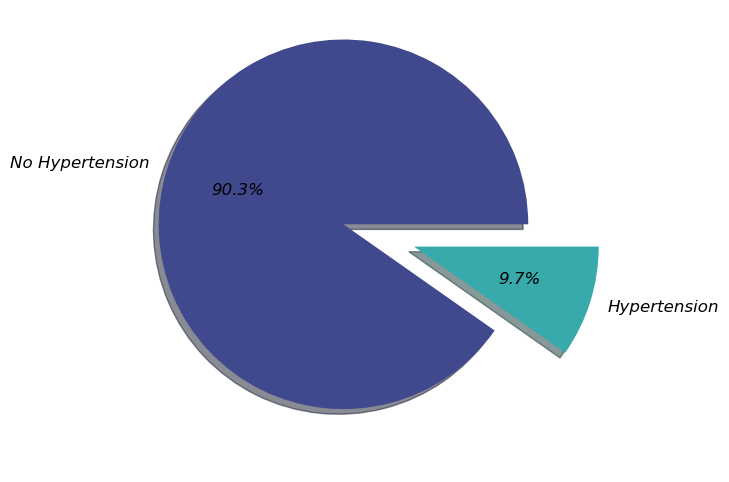

In [33]:
plt.figure(figsize=(10,6))
plt.pie(df_final.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

([<matplotlib.patches.Wedge at 0x14a31740a90>,
 [Text(-1.3798858615132712, 0.23646354728747945, 'No Heart Disease'),
  Text(1.1827593098685178, -0.2026830405321259, 'Heart Disease')],
 [Text(-0.8870694824013884, 0.15201228039909392, '94.6%'),
  Text(0.6899429307566354, -0.11823177364374012, '5.4%')])

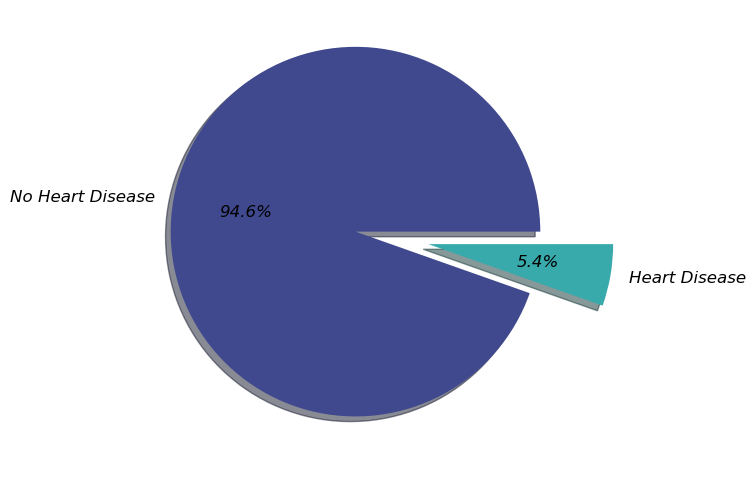

In [34]:
plt.figure(figsize=(10,6))
plt.pie(df_final.heart_disease.value_counts(),labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

C:\Users\Dharmesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

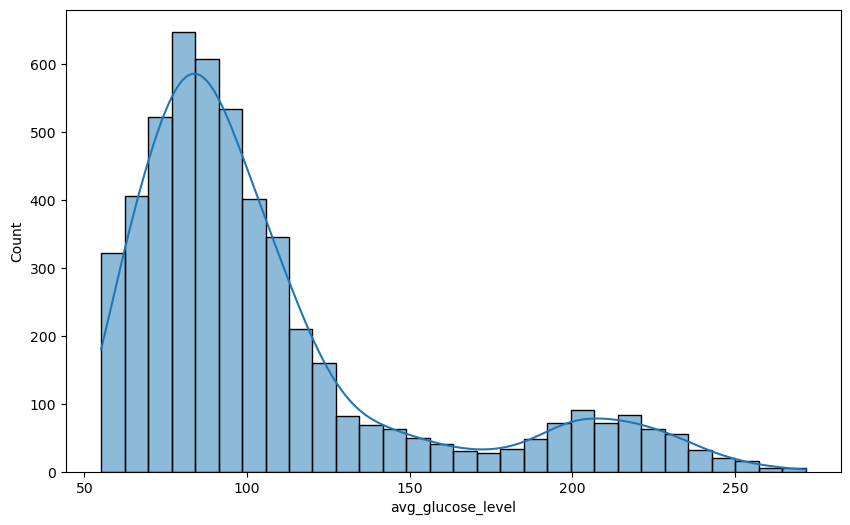

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df_final.avg_glucose_level,kde=True,bins=30)

<Axes: >

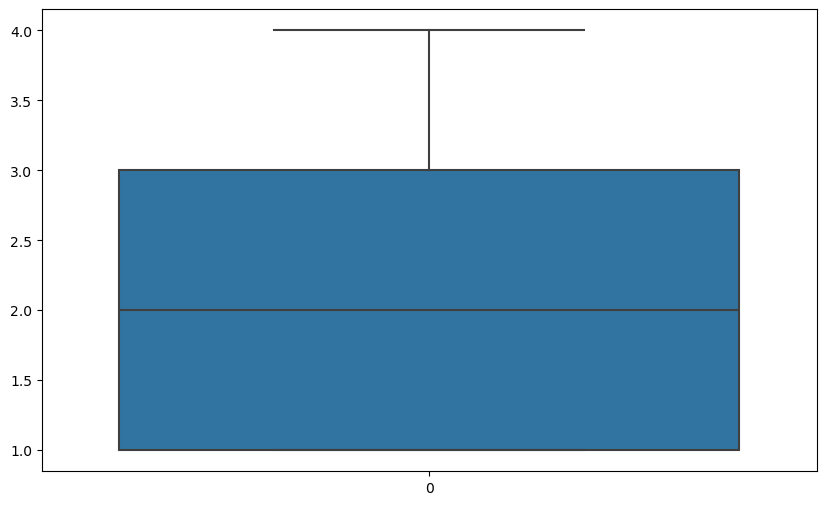

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(df_final.bin_age)

<Axes: >

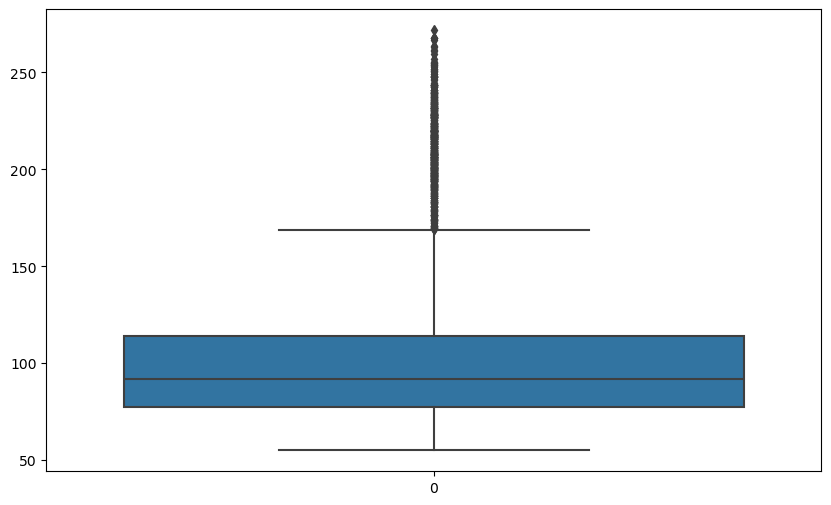

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(df_final.avg_glucose_level)

<Axes: >

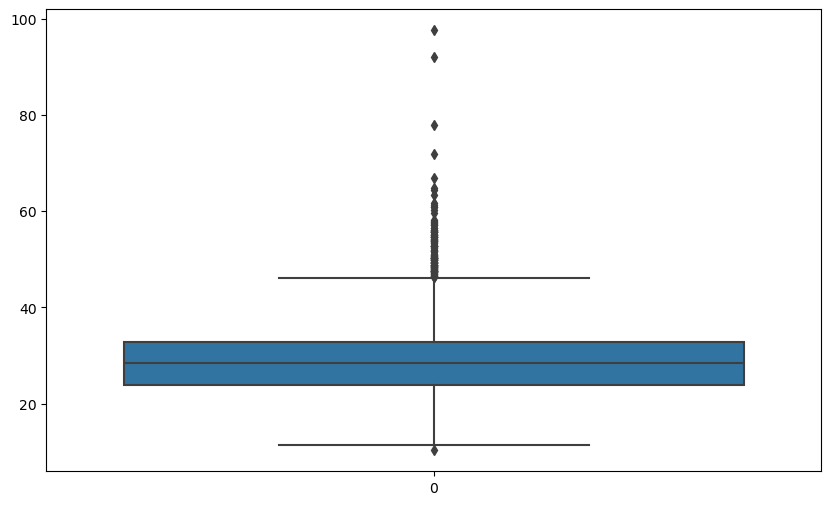

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(df_final.bmi)

In [50]:
X=df_final.copy().drop(columns='stroke')

In [51]:
y=df_final['stroke']

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   object  
 1   hypertension       5109 non-null   int64   
 2   heart_disease      5109 non-null   int64   
 3   ever_married       5109 non-null   object  
 4   work_type          5109 non-null   object  
 5   Residence_type     5109 non-null   object  
 6   avg_glucose_level  5109 non-null   float64 
 7   bmi                5109 non-null   float64 
 8   smoking_status     5109 non-null   object  
 9   bin_age            5109 non-null   category
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 533.4+ KB


In [56]:
X["ever_married"].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [57]:
X["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [58]:
X["work_type"].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [53]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [61]:
encoders = p_utils.build_encoders(df_final)
encoders

[{'column': 'smoking_status',
  'multi_col_output': True,
  'encoder': OneHotEncoder(sparse_output=False)},
 {'column': 'work_type',
  'multi_col_output': True,
  'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)},
 {'column': 'Residence_type',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Urban', 'Rural']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'gender',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Male', 'Female']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'ever_married',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['No', 'Yes']], handle_unknown='use_encoded_value',
                 unknown_value=-1)}]

In [64]:
df_final["bin_age"]=df_final["bin_age"].astype("int64")
df_final

C:\Users\Dharmesh\AppData\Local\Temp\ipykernel_22516\3566159647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["bin_age"]=df_final["bin_age"].astype("int64")


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,4
5106,Female,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,4
5107,Female,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2
5108,Male,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,3


In [65]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   hypertension       5109 non-null   int64  
 2   heart_disease      5109 non-null   int64  
 3   ever_married       5109 non-null   object 
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
 10  bin_age            5109 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 608.0+ KB


In [66]:
df_encoded = p_utils.encode_categorical(df_final, encoders)

df_encoded.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,1,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,1,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,1,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,1,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,1,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [75]:
X=df_encoded.copy().drop(columns='stroke')
y=df_encoded['stroke']

In [76]:
X

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,83.75,28.893237,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5105,0,0,125.20,40.000000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5106,0,0,82.99,30.600000,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
5107,0,0,166.29,25.600000,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [77]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

In [78]:
numerical = X.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'bin_age',
 'x0_Unknown',
 'x0_formerly smoked',
 'x0_never smoked',
 'x0_smokes',
 'x0_Govt_job',
 'x0_Never_worked',
 'x0_Private',
 'x0_Self-employed',
 'x0_children',
 'Residence_type',
 'gender',
 'ever_married']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
X_train

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
1914,0,0,77.86,28.9,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1751,0,0,88.82,28.2,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
396,1,0,213.37,36.0,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1783,0,0,65.67,16.6,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2361,0,0,101.98,23.2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0,137.77,29.3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2763,0,0,63.73,32.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
905,0,0,76.26,35.6,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3980,0,0,76.45,28.7,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
X_test

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,0,0,61.07,19.100000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3232,0,0,93.55,23.300000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3694,0,0,92.62,15.400000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1070,0,0,246.34,21.100000,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4163,1,0,222.52,28.893237,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,0,0,85.38,23.400000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5077,0,0,76.31,15.500000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4878,0,0,81.88,18.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3125,0,0,114.61,40.100000,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
X_train[numerical[:-1]] = StandardScaler().fit_transform(X_train[numerical[:-1]])

In [86]:
X_train

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
1914,-0.328917,-0.237773,-0.608034,0.007130,-0.433668,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,-1.182105,1.0
1751,-0.328917,-0.237773,-0.365389,-0.084914,1.369242,-0.666761,2.195948,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,0.845949,1.0
396,3.040282,-0.237773,2.392041,0.940714,0.467787,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,-1.182105,1.0
1783,-0.328917,-0.237773,-0.877910,-1.610207,-1.335122,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,-1.158930,-0.429226,2.520549,1.009705,-1.182105,0.0
2361,-0.328917,-0.237773,-0.074038,-0.742368,-0.433668,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,0.845949,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.328917,-0.237773,0.718322,0.059726,0.467787,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,-0.990388,-1.182105,1.0
2763,-0.328917,-0.237773,-0.920860,0.414751,-0.433668,1.499788,-0.455384,-0.761442,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,0.845949,1.0
905,-0.328917,-0.237773,-0.643456,0.888118,-0.433668,-0.666761,-0.455384,1.313298,-0.425809,-0.387434,-0.068707,0.862865,-0.429226,-0.396739,1.009705,0.845949,1.0
3980,-0.328917,-0.237773,-0.639250,-0.019169,1.369242,1.499788,-0.455384,-0.761442,-0.425809,2.581085,-0.068707,-1.158930,-0.429226,-0.396739,1.009705,-1.182105,1.0


In [88]:
X_train["heart_disease"].value_counts()

heart_disease
-0.237773    3626
 4.205687     205
Name: count, dtype: int64

In [89]:
X_test[numerical[:-1]] = StandardScaler().fit_transform(X_test[numerical[:-1]])

In [90]:
X_test

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4673,-0.327799,-0.242536,-1.043731,-1.247841,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3232,-0.327799,-0.242536,-0.330295,-0.720615,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3694,-0.327799,-0.242536,-0.350723,-1.712302,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,0.824239,0.0
1070,-0.327799,-0.242536,3.025797,-0.996781,1.378567,-0.632282,-0.463496,1.276569,-0.432006,-0.374237,-0.056033,-1.150494,2.175073,-0.386368,1.036665,0.824239,1.0
4163,3.050648,-0.242536,2.502581,-0.018496,1.378567,-0.632282,2.157514,-0.783349,-0.432006,-0.374237,-0.056033,0.869192,-0.459755,-0.386368,-0.964631,0.824239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,-0.327799,-0.242536,-0.509752,-0.708062,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
5077,-0.327799,-0.242536,-0.708979,-1.699749,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,0.824239,0.0
4878,-0.327799,-0.242536,-0.586631,-1.385924,-1.301669,1.581572,-0.463496,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,-0.459755,2.588203,-0.964631,-1.213241,0.0
3125,-0.327799,-0.242536,0.132296,1.388289,0.485155,-0.632282,2.157514,-0.783349,-0.432006,-0.374237,-0.056033,-1.150494,2.175073,-0.386368,-0.964631,-1.213241,1.0


In [91]:
lr = LogisticRegression(random_state = 1)

In [92]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [93]:
lr_predictions = lr.predict(X_test)

In [94]:
accuracy_score(y_test, lr_predictions)

0.9413145539906104

In [95]:
print(balanced_accuracy_score(y_test, lr_predictions))

0.5


In [96]:
# Create a confusion matrix for logistic regression model
print(confusion_matrix(y_test, lr_predictions, labels = [1,0]))

[[   0   75]
 [   0 1203]]


In [110]:
#cm = confusion_matrix(y_test, lr_predictions, labels=lr.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
#disp.plot()
#plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [150, 1278]

In [99]:
y_test.value_counts()

stroke
0    1203
1      75
Name: count, dtype: int64

# Random under sampler

In [101]:
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [102]:
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9720, 17) (9720,)
(498, 17) (498,)


In [103]:
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.75      0.71      0.73        68
           1       0.77      0.80      0.79        82

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



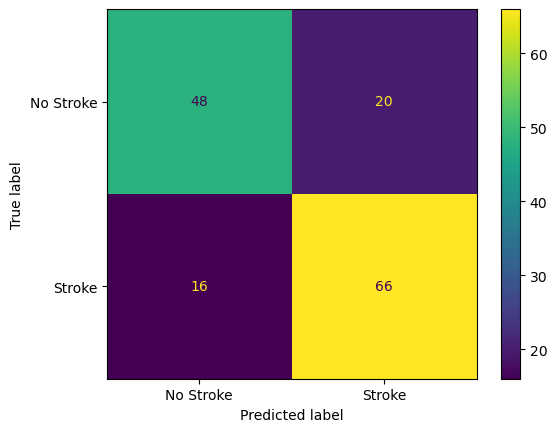

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

In [105]:
y_test.value_counts()

stroke
1    82
0    68
Name: count, dtype: int64

# Random Over Sampler

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.98      1460

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



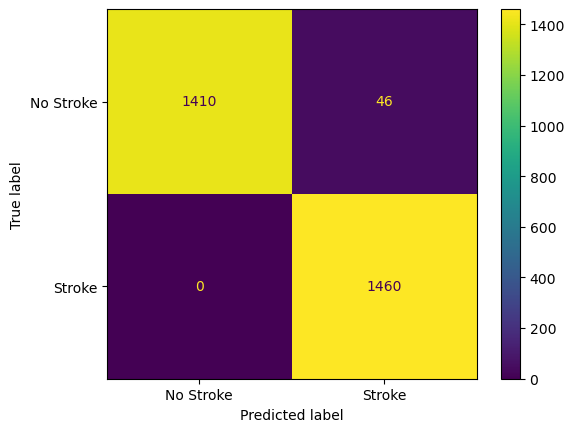

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

In [112]:
print(balanced_accuracy_score(y_test, y_pred))

0.9842032967032968


In [113]:
ros1 = RandomOverSampler()
X_over_resampled1, y_over_resampled1 = ros1.fit_resample(X, y)
rus1 = RandomUnderSampler()
X_under_resampled1, y_under_resampled1 = rus1.fit_resample(X, y)

In [114]:
print(X_over_resampled1.shape,y_over_resampled1.shape)
print(X_under_resampled1.shape,y_under_resampled1.shape)

(9720, 17) (9720,)
(498, 17) (498,)


In [115]:
print(y_over_resampled1.value_counts())
print(y_under_resampled1.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.72      0.72      0.72        68
           1       0.77      0.77      0.77        82

    accuracy                           0.75       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.75      0.75      0.75       150



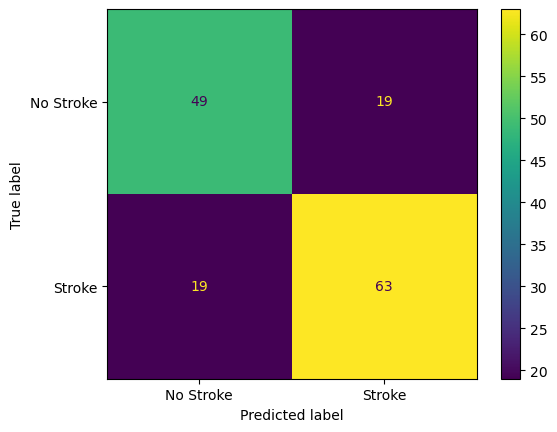

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled1,y_under_resampled1,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.98      1460

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



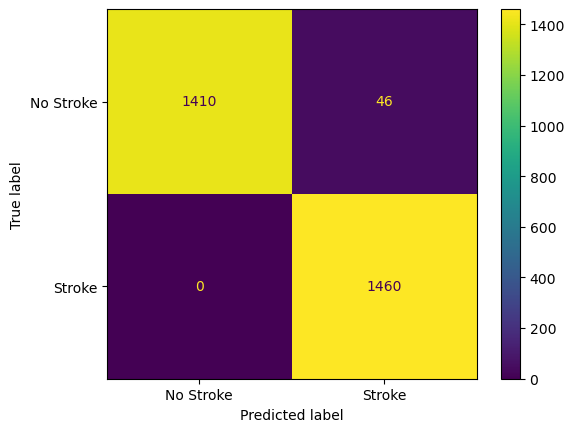

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled1,y_over_resampled1,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

# Check the effect of scaling on prediction

In [118]:
X[numerical[:-1]] = StandardScaler().fit_transform(X[numerical[:-1]])

In [119]:
X.describe()

,hypertension,heart_disease,avg_glucose_level,bmi,bin_age,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
count,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5109.000000
mean,-6.119374e-17,-6.953834e-17,-1.613289e-16,-1.696735e-16,-6.675680e-17,-1.807997e-17,6.049835e-17,-4.450454e-17,3.615994e-17,4.172300e-17,-1.599382e-17,-5.006760e-17,3.685532e-17,-2.781534e-18,3.615994e-17,6.953834e-17,0.656293
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,0.474991
min,-3.286375e-01,-2.389715e-01,-1.126761e+00,-2.415661e+00,-1.326629e+00,-6.581030e-01,-4.574175e-01,-7.668935e-01,-4.273627e-01,-3.841538e-01,-6.576283e-02,-1.156812e+00,-4.369314e-01,-3.941568e-01,-9.838840e-01,-1.189791e+00,0.000000
25%,-3.286375e-01,-2.389715e-01,-6.382516e-01,-6.618409e-01,-1.326629e+00,-6.581030e-01,-4.574175e-01,-7.668935e-01,-4.273627e-01,-3.841538e-01,-6.576283e-02,-1.156812e+00,-4.369314e-01,-3.941568e-01,-9.838840e-01,-1.189791e+00,0.000000
50%,-3.286375e-01,-2.389715e-01,-3.149342e-01,-6.424281e-02,-4.272464e-01,-6.581030e-01,-4.574175e-01,-7.668935e-01,-4.273627e-01,-3.841538e-01,-6.576283e-02,8.644443e-01,-4.369314e-01,-3.941568e-01,-9.838840e-01,8.404837e-01,1.000000
75%,-3.286375e-01,-2.389715e-01,1.755632e-01,5.073727e-01,4.721363e-01,1.519519e+00,-4.574175e-01,1.303962e+00,-4.273627e-01,-3.841538e-01,-6.576283e-02,8.644443e-01,-4.369314e-01,-3.941568e-01,1.016380e+00,8.404837e-01,1.000000
max,3.042866e+00,4.184599e+00,3.657189e+00,8.925710e+00,1.371519e+00,1.519519e+00,2.186187e+00,1.303962e+00,2.339933e+00,2.603124e+00,1.520616e+01,8.644443e-01,2.288689e+00,2.537062e+00,1.016380e+00,8.404837e-01,1.000000


In [120]:
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [121]:
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9720, 17) (9720,)
(498, 17) (498,)


In [122]:
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.77      0.78      0.77        68
           1       0.81      0.80      0.81        82

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



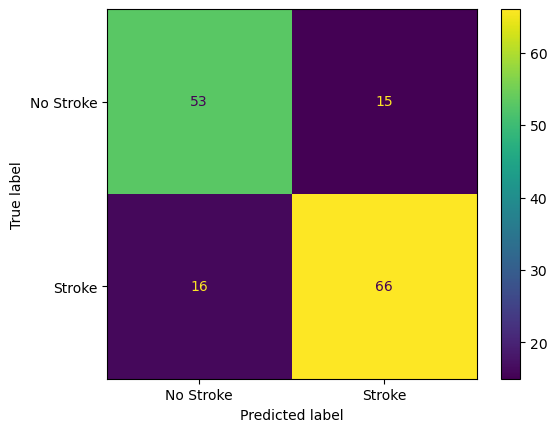

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1456
           1       0.97      1.00      0.99      1460

    accuracy                           0.98      2916
   macro avg       0.99      0.98      0.98      2916
weighted avg       0.99      0.98      0.98      2916



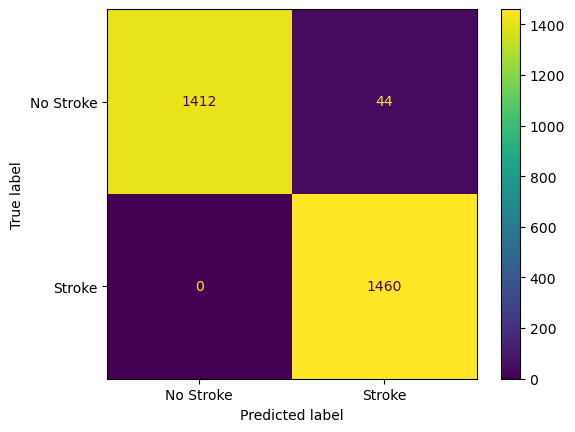

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()